In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stream_views_df = pd.read_csv("generated/user_views_per_stream.csv", header=0)
stream_views_df.head()

,USERID,STREAMID,num_views,day_of_week,time_labeled,num_cards,views_per_card
0,245,163,1029,Wednesday,Afternoon,15,68.600000
1,245,167,258,Thursday,Afternoon,14,18.428571
2,245,171,123,Wednesday,Afternoon,6,20.500000
3,245,172,83,Wednesday,Afternoon,4,20.750000
4,245,173,167,Monday,Afternoon,8,20.875000


G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


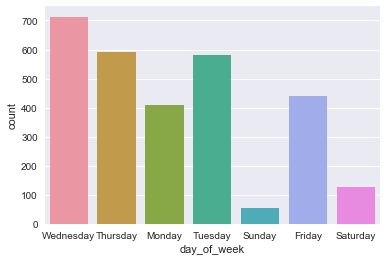

In [3]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="day_of_week", data=stream_views_df)

G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


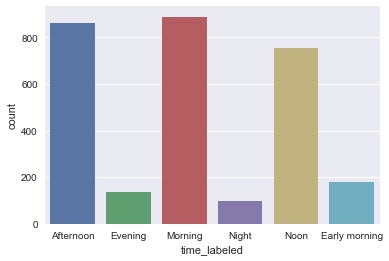

In [4]:
ax = sns.countplot(x="time_labeled", data=stream_views_df)

In [5]:
stream_views_df = stream_views_df[(stream_views_df["num_cards"] > 1) & (stream_views_df["num_views"] > 1)]
stream_views_df.head()

,USERID,STREAMID,num_views,day_of_week,time_labeled,num_cards,views_per_card
0,245,163,1029,Wednesday,Afternoon,15,68.600000
1,245,167,258,Thursday,Afternoon,14,18.428571
2,245,171,123,Wednesday,Afternoon,6,20.500000
3,245,172,83,Wednesday,Afternoon,4,20.750000
4,245,173,167,Monday,Afternoon,8,20.875000


## Cluster  the users and the streams and based on that set the values for user type and stream type - based on the views

In [6]:
content_views_per_user_df = pd.read_csv("../data/content_views_per_user_scaled.csv", header=0)
content_views_per_user_df.head()

,Unnamed: 0,163,167,171,172,173,178,179,184,185,...,1657,1658,1659,1660,1661,1662,1665,1668,1670,1677
0,245,1.000000,1.000000,1.000000,1.000000,1.000000,0.920755,0.2,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,246,0.040816,0.000000,0.000000,0.036145,0.000000,0.415094,0.2,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,247,0.299320,0.116279,0.276423,0.457831,0.479042,0.633962,0.4,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,248,0.014577,0.023256,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,249,0.119534,0.736434,0.113821,0.373494,0.125749,1.000000,0.2,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
new_column_names = ["UserId"]
new_column_names.extend(content_views_per_user_df.columns.values[1:])
content_views_per_user_df.columns = new_column_names
content_views_per_user_df.head()

,UserId,163,167,171,172,173,178,179,184,185,...,1657,1658,1659,1660,1661,1662,1665,1668,1670,1677
0,245,1.000000,1.000000,1.000000,1.000000,1.000000,0.920755,0.2,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,246,0.040816,0.000000,0.000000,0.036145,0.000000,0.415094,0.2,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,247,0.299320,0.116279,0.276423,0.457831,0.479042,0.633962,0.4,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,248,0.014577,0.023256,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,249,0.119534,0.736434,0.113821,0.373494,0.125749,1.000000,0.2,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.cluster import KMeans
user_id = content_views_per_user_df["UserId"].values
len(user_id)

219

In [9]:
content_views_per_user_df = content_views_per_user_df.drop("UserId", axis=1)
content_views_per_user_values = content_views_per_user_df.values
content_views_per_user_values.shape

(219, 153)

In [10]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42).fit(content_views_per_user_values)

G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


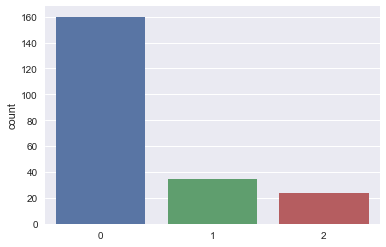

In [11]:
kmeans_k3.labels_
sns.countplot(x=kmeans_k3.labels_)

In [12]:
from sklearn.metrics import silhouette_score
ss_k3 = silhouette_score(content_views_per_user_values, kmeans_k3.labels_)
ss_k3

0.24214283319540458

G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


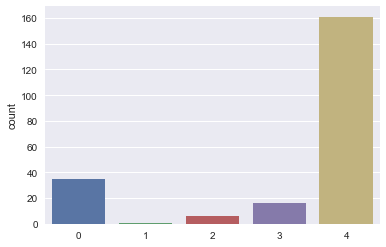

In [13]:
kmeans_k5 = KMeans(n_clusters=5, random_state=21).fit(content_views_per_user_values)
sns.countplot(x=kmeans_k5.labels_)

In [14]:
ss_k5 = silhouette_score(content_views_per_user_values, kmeans_k5.labels_)
ss_k5

0.2566075422041427

G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


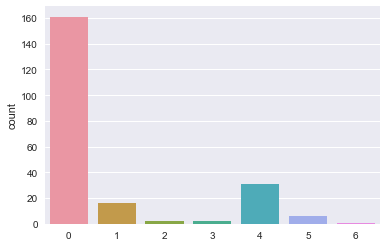

In [15]:
kmeans_k7 = KMeans(n_clusters=7, random_state=21).fit(content_views_per_user_values)
sns.countplot(x=kmeans_k7.labels_)

In [16]:
ss_k7 = silhouette_score(content_views_per_user_values, kmeans_k7.labels_)
ss_k7

0.30560460041320014

## Let us go with 3 clusters since they are more or equally distributed with no cluster having extremely low number of members

In [17]:
userid_cluster = list(zip(user_id, kmeans_k3.labels_))

In [18]:
userid_cluster_dict = {uc[0]: uc[1] for uc in userid_cluster}

In [19]:
stream_views_df["user_type"] = stream_views_df["USERID"].apply(lambda x: userid_cluster_dict.get(x))

In [20]:
stream_views_df.head()

,USERID,STREAMID,num_views,day_of_week,time_labeled,num_cards,views_per_card,user_type
0,245,163,1029,Wednesday,Afternoon,15,68.600000,0
1,245,167,258,Thursday,Afternoon,14,18.428571,0
2,245,171,123,Wednesday,Afternoon,6,20.500000,0
3,245,172,83,Wednesday,Afternoon,4,20.750000,0
4,245,173,167,Monday,Afternoon,8,20.875000,0


## Cluster the streams

In [22]:
stream_ids = content_views_per_user_df.columns.values
stream_ids

array(['163', '167', '171', '172', '173', '178', '179', '184', '185',
       '186', '188', '189', '190', '191', '192', '198', '199', '200',
       '201', '202', '203', '204', '205', '206', '217', '218', '219',
       '220', '223', '228', '229', '230', '231', '232', '233', '236',
       '237', '238', '244', '245', '246', '247', '248', '308', '315',
       '316', '318', '363', '364', '404', '412', '413', '414', '415',
       '416', '417', '418', '419', '426', '427', '435', '439', '440',
       '475', '492', '493', '494', '495', '496', '497', '498', '499',
       '500', '505', '506', '507', '509', '517', '518', '519', '520',
       '521', '522', '523', '524', '548', '549', '556', '557', '558',
       '560', '561', '562', '565', '570', '578', '603', '606', '607',
       '608', '610', '611', '612', '622', '623', '624', '629', '634',
       '636', '637', '688', '752', '753', '755', '820', '1058', '1089',
       '1090', '1092', '1093', '1094', '1095', '1096', '1097', '1128',
       '1201', '1

In [23]:
content_views_per_user_values_transposed = content_views_per_user_values.T
content_views_per_user_values_transposed.shape

(153, 219)

In [24]:
content_views_per_user_values_transposed

array([[1.        , 0.04081633, 0.29931973, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.11627907, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.27642276, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


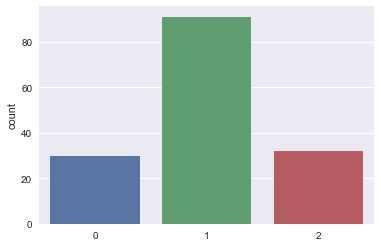

In [25]:
streams_kmeans_k3 = KMeans(n_clusters=3, random_state=42).fit(content_views_per_user_values_transposed)
sns.countplot(x=streams_kmeans_k3.labels_)

In [27]:
streams_ss_k3 = silhouette_score(content_views_per_user_values_transposed, streams_kmeans_k3.labels_)
streams_ss_k3

0.16975533017880845

G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


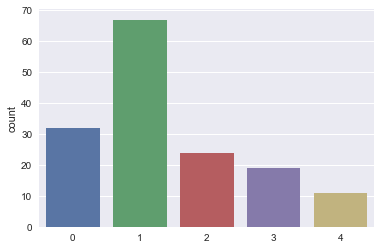

In [28]:
streams_kmeans_k5 = KMeans(n_clusters=5, random_state=42).fit(content_views_per_user_values_transposed)
sns.countplot(x=streams_kmeans_k5.labels_)

In [29]:
streams_ss_k5 = silhouette_score(content_views_per_user_values_transposed, streams_kmeans_k5.labels_)
streams_ss_k5

0.18713746058845193

G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


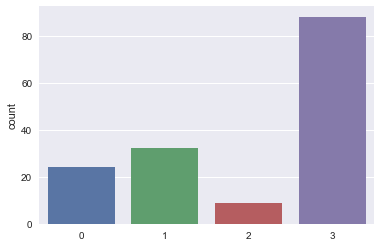

In [32]:
streams_kmeans_k4 = KMeans(n_clusters=4, random_state=21).fit(content_views_per_user_values_transposed)
sns.countplot(x=streams_kmeans_k4.labels_)

## 5 clusters for streams gives a proper distribution

In [35]:
stream_ids = stream_ids.astype(int)
streamid_cluster = list(zip(stream_ids, streams_kmeans_k5.labels_))

In [36]:
streamid_cluster_dict = {sc[0]: sc[1] for sc in streamid_cluster}
stream_views_df["stream_type"] = stream_views_df["STREAMID"].apply(lambda x: streamid_cluster_dict.get(x))
stream_views_df.head()

,USERID,STREAMID,num_views,day_of_week,time_labeled,num_cards,views_per_card,user_type,stream_type
0,245,163,1029,Wednesday,Afternoon,15,68.600000,0,1
1,245,167,258,Thursday,Afternoon,14,18.428571,0,1
2,245,171,123,Wednesday,Afternoon,6,20.500000,0,1
3,245,172,83,Wednesday,Afternoon,4,20.750000,0,1
4,245,173,167,Monday,Afternoon,8,20.875000,0,1


G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


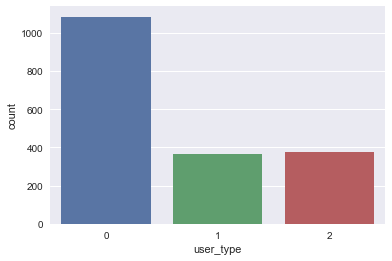

In [37]:
sns.countplot(x="user_type", data=stream_views_df)

G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


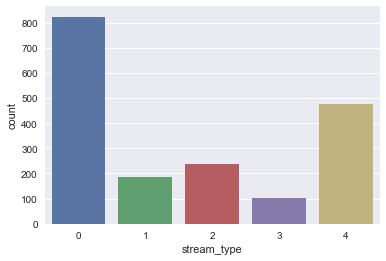

In [38]:
sns.countplot(x="stream_type", data=stream_views_df)

In [39]:
stream_views_df.to_csv("generated/clustered_user_views_per_stream.csv", index=False)